In [404]:
from IPython.display import HTML
from IPython.display import Image

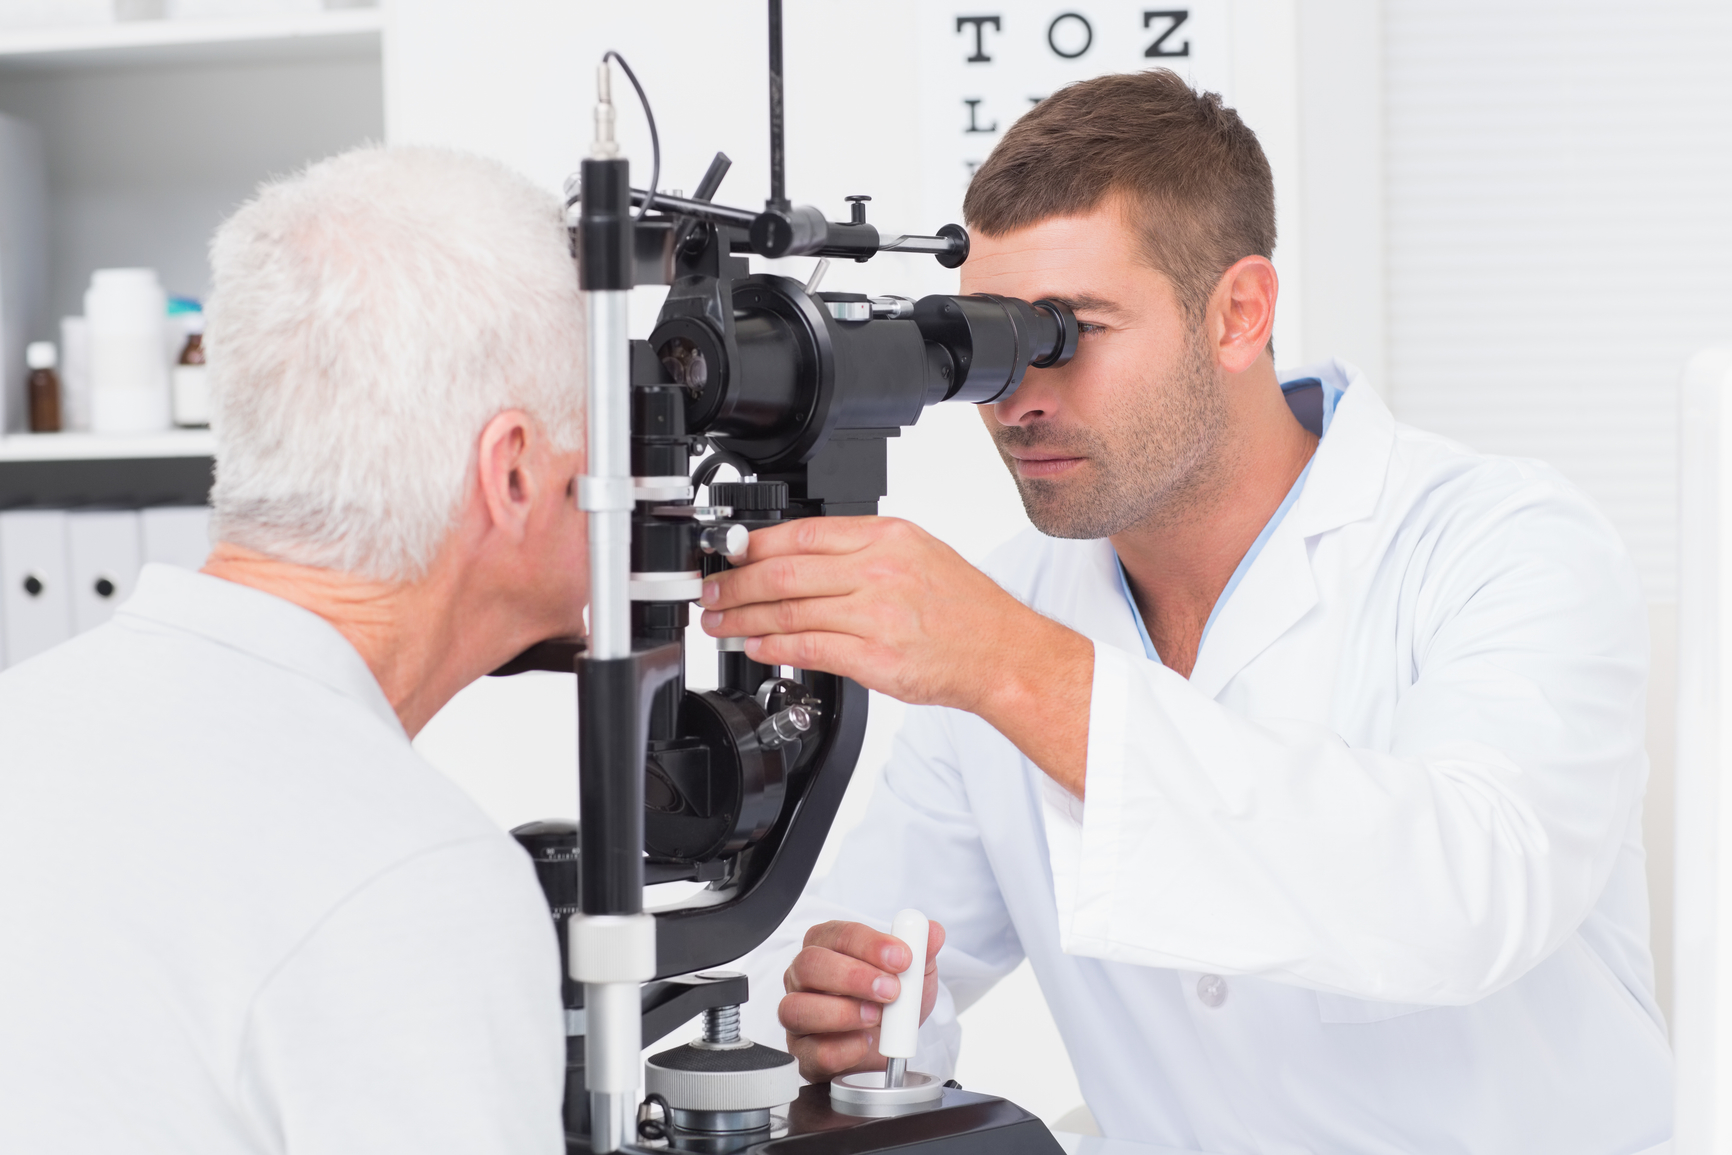

In [686]:
Image("eyeexam.jpg")

Glaucoma Data Storytelling
==================

In [405]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

Summary
----

Glaucoma is a general term for a number of eye conditions that progressively damage the optic nerve, consequently causing vision loss. Diagnosis of glaucoma is complex, but is often associated with elevated intraocular pressure, optic nerve damage, and reduction in visual acuity and visual field. Vision loss from glaucoma is permanent, but progression may be slowed or halted through early diagnosis and treatment. 

Glaucoma is not a common problem; but it is a costly and crippling disease particularly for individuals and the family of those diagnosed with it. Compared to the general population few adults are diagnosed with Glaucoma each year thus prevalence data for those diagnosed with Glaucoma can be difficult to come by. Luckily, there are a key number of national surveys and clinical studies that can help to understand the scope of the chronic condition. Unfortunately, these sources of data are not collected in a systematic fashion so the findings that can be obtained are limited. 

According to an assessment of the economic burdens associated with Glaucoma, an estimated 3% of the global population over 40 years of age currently have Glaucoma, *the majority of whom are undiagnosed.* The direct medical costs for those diagnosed with Glaucoma include ocular hypertensive medications, physician and hospital visits, and glaucoma-related procedures. The Indirect costs include lost productivity, days missed from work, and the cost borne by caregivers such as family and friends. Direct cost estimates for approximately 2 million US citizens are 2.9 billion dollars each year for those whom have been diagnosed, to say the least for those whom are undiagnosed. For those receiving treatment for glaucoma the estimated average annual incrimental cost is 137 dollars per patient per year; a cost that only increases with severity of disease.

Below I investigate the overall prevalence of glaucoma using the most recent estimates I could find from the Behavioral Risk Factor Surveillance Survey (BRFSS). By doing this task I can start to build a case against glaucoma and helping to build awareness and context around the disease. I also investigate multiple year trends from different years of the BRFSS in order to gain some insight on the stability of the chronic condition. Lastly, I finish with a simple meta-analysis of literature review provided by the CDC that shows the difficulty in assessing the prevalence from multiple data sources. 

**Conclusions**
---
From my brief investigation of the data I found that the overall prevalence to be anywhere between 3 and 6 percent in the United States among adults 40 years or older. Assuming there are approximately 154911104 adults over 40 in the United States an estimated 4647333.12 to 143415641.9 adults per year suffer from glaucoma. Furthermore, I also concur with tne background research that finding an accurate prevalence source for glaucoma to be difficult because few research studies glaucoma at the cross-sectional or national level. 

For those whom are interested in learning more about Glaucoma, check out: https://www.glaucoma.org/

    Calculated by : 
        (.03x154911104)
        (.06x143415641.9)

* **Glaucoma Risk Factors**: *Age, race, sex, socio-economic status, BMI (obesity), cigarette smoking, nutritional factors, exercise, and sleep apnea.*

* **Glaucoma Diagnosis**: *Glaucoma diagnosis is based on clinical assessment of intraocular pressure, visual fields, and cup to disk ratio.*

**Source(s):**

    Varma, Rohit et al. “An assessment of the health and economic burdens of glaucoma.” American journal of ophthalmology vol. 152,4 (2011): 515-22. doi:10.1016/j.ajo.2011.06.004
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3206636/
    
    Coleman AL, Kodjebacheva G. Risk factors for glaucoma needing more attention. Open Ophthalmol J. 2009;3:38–42. Published 2009 Sep 17. doi:10.2174/1874364100903020038
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2759104/
    
    NORC | Published Examination based Prevalence of Major Eye Disorders. JUNE 22, 2018.
    http://www.norc.org/PDFs/VEHSS/EyeConditionExamLiteratureReviewVEHSS.pdf 
    
    * Population estimates collected from Census Reporter
    https://censusreporter.org/profiles/01000US-united-states/

How can we obtain the prevalence of Glaucoma?
=====

One of the best and most commonly used sources to obtain chronic disease prevalence(s) in the United States is the Behavioral Risk Factor Surveillance System (BRFSS). From 2005 to 2011 the Vision Impairment module was available for the BRFSS where some respondants whom met certain conditions were asked, **"Have you EVER been told by an eye doctor or other health care professional that you had glaucoma."** Unfortunately, 2010 reflects the last year the module was asked on the BRFSS; therefore, 2010 data reflects most current prevalence estimates available from the BRFSS survey.


In [695]:
#Import packages

In [696]:
#https://chronicdata.cdc.gov/Vision-Eye-Health/Behavioral-Risk-Factors-Vision-Eye-Health/pttf-ck53/data
#http://www.norc.org/PDFs/VEHSS/EyeConditionExamLiteratureReviewVEHSS.pdf

In [697]:
import pandas as pd
import webbrowser
import matplotlib.pyplot as plt
import xport

In [698]:
import numpy as np
import pandas as pd
import matplotlib as plt
import statsmodels.api as sm
from pandas.core import datetools
import pandas.tseries 
import statsmodels.stats.weightstats as smf
#Turn off annoying warnings
import warnings
warnings.filterwarnings(action='ignore')

2010 Behavioral Risk Factor Surveillance Survey
=======


**The Behavioral Risk Factor Surveillance System**, available at: https://www.cdc.gov/brfss/annual_data/annual_data.htm

The Behavioral Risk Factor Surveillance System (BRFSS) is a cross-sectional telephone survey that state health departments conducts monthly over landline telephones and cellular telephones with a standardized questionnaire and technical and methodologic assistance from CDC. BRFSS is used to collect prevalence data among adult U.S. residents regarding their risk behaviors and preventive health practices that can affect their health status. 


BRFSS 2010 Weighting Formula
---------------------

In [723]:
from IPython.display import display, Math, Latex

In [727]:
Math(r'FINALWT = STRWT*\frac{1}{NPH}*NAD*POSTSTRAT')

<IPython.core.display.Math object>

The computational formula above is intended to reflect all the possible factors that could be taken into account in weighting a state’s data. Where a factor does not apply its value is set to one.

FINALWT is the final weight assigned to each respondent.

STRWT accounts for differences in the basic probability of selection among strata (subsets of area code/prefix combinations). It is the inverse of the sampling fraction of each stratum. There is almost never a complete correspondence between strata, which are defined by subsets of area code/prefix combinations, and regions, which are defined by the boundaries of government entities.

1/NPH is the inverse of the number of residential telephone numbers in the respondent’s household.

NAD is the number of adults in the respondent’s household.

POSTSTRAT is the number of people in an age-by-gender or age-by-race-by-gender category in the population of a region or a state divided by the sum of the products of the preceding weights for the respondents in that same age-by-gender or age-by-race-by-gender category. It adjusts for non-coverage and non-response and, before 1995, also adjusts for different probabilities of selection by region, where applicable.
Calculation of CHILDWT

CHILDWT = STRWT * 1 OVER NPH * CHILDREN * POSTCH

CHILDWT is the final weight assigned to each child.

STRWT accounts for differences in the basic probability of selection among strata (subsets of area code/prefix combinations). It is the inverse of the sampling fraction of each stratum. There is almost never a complete correspondence between strata, which are defined by subsets of area code/prefix combinations, and regions, which are defined by the boundaries of government entities.

1/NPH is the inverse of the number of residential telephone numbers in the respondent’s household.

CHILDREN is the number of children (less than 18 years of age) in the respondent’s household.

POSTCH is the number of children in an age-by-gender or age-by-race-by-gender category in the population of a region or a state divided by the sum of the products of the preceding weights for the children in that same age-by-gender or age-by-race-by-gender category. It adjusts for non-coverage and non-response.
Calculation of HOUSEWT

HOUSEWT = STRWT * 1 OVER NPH * POSTHH

HOUSEWT is the weight assigned to each household.

STRWT accounts for differences in the basic probability of selection among strata (subsets of area code/prefix combinations). It is the inverse of the sampling fraction of each stratum. There is almost never a complete correspondence between strata, which are defined by subsets of area code/prefix combinations, and regions, which are defined by the boundaries of government entities.

1/NPH is the inverse of the number of residential telephone numbers in the household.

POSTHH is the number of households in the population of a region or a state divided by the sum of the products of the preceding weights for the households in that same category. It adjusts for non-coverage and non-response.


**Data Resources**

<a href="https://www.cdc.gov/brfss/annual_data/2010/pdf/codebook_10.pdf" target="_blank">CDC BRFSS 2010 Codebook</a>

In [739]:
url = 'https://www.cdc.gov/brfss/annual_data/2010/pdf/codebook_10.pdf'
webbrowser.open(url)

True

<a href="https://www.cdc.gov/brfss/annual_data/annual_2010.htm" target="_blank">CDC BRFSS 2010 Data and Documentation</a>

In [722]:
url = 'https://www.cdc.gov/brfss/annual_data/annual_2010.htm'
webbrowser.open(url)

True

<a href="https://www.cdc.gov/brfss/questionnaires/pdf-ques/2010brfss.pdf" target="_blank">CDC BRFSS 2010 Questionnaire</a>

In [703]:
url = 'https://www.cdc.gov/brfss/questionnaires/pdf-ques/2010brfss.pdf'
webbrowser.open(url)

True

In [874]:
BRFSS2010 = pd.read_sas('.\survey_data\CDBRFS10.XPT')

In [875]:
BRFSS2010.head()

,_STATE,_GEOSTR,_DENSTR2,PRECALL,REPNUM,REPDEPTH,FMONTH,IDATE,IMONTH,IDAY,...,_AIDTST2,CPCOUNTY,_ITSCF1,_ITSCF2,_ITSPOST,_ITSFINL,_RAWHH,_WT2HH,_POSTHH,_HOUSEWT
0,1.0,9.0,2.0,1.0,120127.0,25.0,12.0,b'12302010',b'12',b'30',...,NaN,b'CLARKE3',3.351137e+06,88.799712,0.547504,48.618238,0.333333,18.012420,5.472875,98.579718
1,1.0,13.0,1.0,1.0,10170.0,26.0,1.0,b'02022010',b'02',b'02',...,NaN,b'colbert',3.351137e+06,326.702003,0.745529,243.565788,1.000000,33.134644,5.473992,181.378775
2,1.0,17.0,2.0,1.0,80197.0,23.0,8.0,b'08182010',b'08',b'18',...,NaN,b'housaton',3.351137e+06,189.479657,1.242380,235.405792,1.000000,38.434665,5.806179,223.158529
3,1.0,4.0,1.0,1.0,100041.0,19.0,10.0,b'11012010',b'11',b'01',...,NaN,b'jefferson',3.351137e+06,931.521484,0.883034,822.564903,1.000000,94.476411,5.270595,497.946881
4,1.0,13.0,1.0,1.0,120172.0,28.0,12.0,b'12302010',b'12',b'30',...,NaN,b'lauderdale',3.351137e+06,163.351001,0.702397,114.737225,1.000000,33.134644,5.473992,181.378775


Here we can see there are over 451074 respondants to the survey.

In [876]:
BRFSS2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451075 entries, 0 to 451074
Columns: 397 entries, _STATE to _HOUSEWT
dtypes: float64(386), object(11)
memory usage: 1.3+ GB


**Weights**

*Here I am displaying all columns that match the characters 'WT' in order to find weight variables. This is because weight column names have been known to change every couple of years.*

In [877]:
#Find weight names (oftentimes the names can change slightly from dataset to codebook)
comparison=BRFSS2010.columns.str.contains('WT')
BRFSS2010.columns[comparison]

Index(['GP3DYWTR', '_STRWT', '_WT2', '_FINALWT', '_WT2CH', '_CHILDWT', 'WTKG2',
       '_WT2HH', '_HOUSEWT'],
      dtype='object')

In [878]:
WeightVar=BRFSS2010['_FINALWT']
WeightVar.head()

0     50.363890
1    263.438863
2    271.022910
3    839.817658
4    127.440336
Name: _FINALWT, dtype: float64

**Frequency Tables**

*Here I am limiting to people whom recieved the question on the survey. This is important since the survey contains many skip patterns and not all respondants will receive the question when taking the survey. The question only is presented when certain conditions are met.*

In [905]:
comparison=BRFSS2010.columns.str.contains('INSUR') #finding insurance variable
BRFSS2010.columns[comparison]

Index(['VIINSUR2'], dtype='object')

In [906]:
BRFSS2010_minimized=BRFSS2010[['AGE',\
                               'VIINSUR2',\
                               'VIGLUMA2',\
                               'VIDFCLT2',\
                               'VIREDIF2',\
                               'VIPRFVS2',\
                               'VINOCRE2',\
                               'VIEYEXM2',\
                               'VICTRCT2',\
                               '_FINALWT']]

comparison=(BRFSS2010_minimized['AGE']>=40) | \
(BRFSS2010_minimized['VIDFCLT2']!=8) | \
(BRFSS2010_minimized['VIPRFVS2']!=8) | \
(BRFSS2010_minimized['VIREDIF2']!=8) | \
(BRFSS2010_minimized['VINOCRE2']!=8) | \
(BRFSS2010_minimized['VIEYEXM2']!=8) | \
(BRFSS2010_minimized['VIINSUR2']!=np.nan) | \
(BRFSS2010_minimized['VICTRCT2']!=8)
Asked_BRFSS2010=BRFSS2010_minimized[comparison]

#Notes: Section 12.01, AGE, is less than 40; or Module 04.01, 
#VIDFCLT2, is coded as 8; or Module 04.02, VIREDIF2, is coded as 8; 
#or Module 04.03, VIPRFVS2, is coded as 8; or Module 04.04, VINOCRE2, 
#is coded as 8; or Module 04.05, VIEYEXM2, is coded as 8; or 
#Module 04.06, VINSUR2, is coded as 8; or Module 04.07, VICTRCT2, is coded as 8; or Module 04.08

*Note: handling NaN, non-response, Don't know/Not Sure, and Refused can have a strong impact on the accuracy of the estimates. It is also important to make sure that the skip patterns of the survey are taken into account when constructing the estimates.*

In [907]:
temp=pd.DataFrame(BRFSS2010_minimized['VIGLUMA2'])
#one-hot encoding
for x in temp.VIGLUMA2.unique():
    temp[x]=(temp.VIGLUMA2==x).astype(int)
#temp.columns
temp.rename(columns={'VIGLUMA2':'glaucoma', 1:'one', 2:'two',7:'seven',9:'nine',np.nan:'BLANK'}, inplace=True)   

Below we can see a table that includes the frequencies and percentages of those who responded to the Glaucoma question in the 'Visual Impairment and Access to Eye Care' module.

In [913]:
#Setup Statsmodels to get Frequency Weights
#one
freqTemp = smf.DescrStatsW(temp['one'], weights=WeightVar)
counts=np.array(pd.Series(temp.one).value_counts())
one=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#two
freqTemp = smf.DescrStatsW(temp['two'], weights=WeightVar)
counts=np.array(pd.Series(temp.two).value_counts())
two=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#seven
freqTemp = smf.DescrStatsW(temp['seven'], weights=WeightVar)
counts=np.array(pd.Series(temp.seven).value_counts())
seven=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#nine
freqTemp = smf.DescrStatsW(temp['nine'], weights=WeightVar)
counts=np.array(pd.Series(temp.nine).value_counts())
nine=np.array([freqTemp.mean*100,counts[1],freqTemp.sum])
#BLANK
freqTemp = smf.DescrStatsW(temp['BLANK'], weights=WeightVar)
counts=np.array(pd.Series(temp.BLANK).value_counts())
BLANK=np.array([freqTemp.mean*100,counts[0],freqTemp.sum])

#Create Table (DataFrame)
freq_table=pd.DataFrame(np.array([one,two,seven,nine,BLANK]),columns=['Percent','Frequency','Weight_freq'])
#Modify index rows
first,second,seventh,ninth,BLANK = freq_table.index[0],freq_table.index[1],freq_table.index[2],freq_table.index[3],freq_table.index[4]
freq_table.rename(index={first: 'Glaucoma: Yes',second: 'Glaucoma: No',seventh:'Don’t know/Not Sure',ninth:'Refused',BLANK:'BLANK'},inplace=True)
#Create Totals Row
last=np.array([round(freq_table['Percent'].sum()),round(freq_table['Frequency'].sum()),round(freq_table['Weight_freq'].sum())])
freq_table.loc[len(freq_table)]=last
freq_table.rename(index={5:'Total'},inplace=True)
freq_table['Percent']=freq_table['Frequency']/(24383)*100
print('BRFSS 2010: Self reported diagnosis with Glaucoma.')
freq_table

BRFSS 2010: Self reported diagnosis with Glaucoma.


,Percent,Frequency,Weight_freq
Glaucoma: Yes,6.061600,1478.0,4.815537e+05
Glaucoma: No,93.401140,22774.0,1.077470e+07
Don’t know/Not Sure,0.516753,126.0,4.687352e+04
Refused,0.020506,5.0,3.439010e+03
BLANK,1849.956937,451075.0,0.000000e+00
Total,1949.956937,475458.0,1.130657e+07


In [919]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
%matplotlib inline

graphData=freq_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData.loc[0:3]['index'],
               y=graphData.loc[0:3]['Percent'],
               text=round((graphData.loc[0:2]['Percent']),1),
               textposition='outside',marker=dict(
               color=['rgb(228,100,90)','rgb(217,217,217)','rgb(217,217,217)'],line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Approximately one in sixteen adults in the United States<br> 40 Years or Older whom responded to the survey reported being diagnosed with Glaucoma.',
                yaxis=dict(title='Percent Adults Diagnosed</b>',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='black',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

BRFSS MULTI-YEAR TREND
=======

In order to get most accurate comparison results for multiple years, the CDC has bothered with the trouble of managing weighting, post-stratification, and age adjustments to standardize the years. The data is readily available and posted here:  <a href="https://chronicdata.cdc.gov/api/views/pttf-ck53/rows.csv?accessType=DOWNLOAD&bom=true&format=true" target="_blank">CDC BRFSS Data</a>

**Download CDC Data**

In [391]:
url = 'https://chronicdata.cdc.gov/api/views/pttf-ck53/rows.csv?accessType=DOWNLOAD&bom=true&format=true'
webbrowser.open(url)

True

In [367]:
brfss_longterm=pd.read_csv('Behavioral_Risk_Factors_-_Vision___Eye_Health.csv',sep=';')

In [368]:
brfss_longterm.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'Topic', 'Question',
       'DataSource', 'Response', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_limit', 'High_Confidence_Limit', 'Sample_Size',
       'Break_Out', 'Break_Out_Category', 'GeoLocation', 'TopicId',
       'QuestionId', 'LocationId', 'BreakOutId', 'BreakOutCategoryId',
       'ResponseId'],
      dtype='object')

In [379]:
brfss_longterm.head()

,Year,LocationAbbr,LocationDesc,Topic,Question,DataSource,Response,Data_Value_Unit,Data_Value_Type,Data_Value,...,Sample_Size,Break_Out,Break_Out_Category,GeoLocation,TopicId,QuestionId,LocationId,BreakOutId,BreakOutCategoryId,ResponseId
0,2005,IA,Iowa,Visual Impairment,Percentage of Adults 50 Years and Older Who Re...,BRFSS,NaN,%,Crude Prevalence,12.1,...,NaN,Total,Total,"(42.46940091300047, -93.81649055599968)",T01,Q41_2005,19,BO99,BOC99,NaN
1,2005,LA,Louisiana,Visual Impairment,Percentage of Adults 50 Years and Older Who Re...,BRFSS,NaN,%,Crude Prevalence,14.0,...,NaN,Total,Total,"(31.31266064400046, -92.44568007099969)",T01,Q41_2005,22,BO99,BOC99,NaN
2,2005,OH,Ohio,Visual Impairment,Percentage of Adults 50 Years and Older Who Re...,BRFSS,NaN,%,Crude Prevalence,16.8,...,NaN,Total,Total,"(40.06021014100048, -82.40426005599966)",T01,Q41_2005,39,BO99,BOC99,NaN
3,2005,TN,Tennessee,Visual Impairment,Percentage of Adults 50 Years and Older Who Re...,BRFSS,NaN,%,Crude Prevalence,14.0,...,NaN,Total,Total,"(35.68094058000048, -85.77449091399967)",T01,Q41_2005,47,BO99,BOC99,NaN
4,2005,TX,Texas,Visual Impairment,Percentage of Adults 50 Years and Older Who Re...,BRFSS,NaN,%,Crude Prevalence,15.9,...,NaN,Total,Total,"(31.827240407000488, -99.42677020599967)",T01,Q41_2005,48,BO99,BOC99,NaN


In [380]:
brfss_minimized=brfss_longterm[['Year','LocationDesc','Question','QuestionId','Topic','Data_Value_Type','Data_Value']]
comparison=(BRFSS2010_minimized['AGE']>=40) | (BRFSS2010_minimized['VIDFCLT2']!=8) | (BRFSS2010_minimized['VIDFCLT2']!=8) | (BRFSS2010_minimized['VIDFCLT2']!=8) | (BRFSS2010_minimized['VIPRFVS2']!=8) | (BRFSS2010_minimized['VINOCRE2']!=8) | (BRFSS2010_minimized['VIEYEXM2']!=8) | (BRFSS2010_minimized['VIINSUR2']!=8) | (BRFSS2010_minimized['VICTRCT2']!=8)
Asked_BRFSS2010=BRFSS2010_minimized[comparison]

In [381]:
comparison=brfss_minimized.Question.str.contains('Glauc.*',regex=True)#For 'Glaucoma'
brfss_glaucoma=brfss_minimized[comparison]

Frequency Table and Trend Graph

In [382]:
groupby_table=brfss_glaucoma.groupby(by='Year').mean()
#groupby_table

Trend Graph

In [384]:
graphData=groupby_table.reset_index().copy()

In [385]:
graphData

,Year,Data_Value
0,2005,6.635965
1,2006,5.389437
2,2007,4.913592
3,2008,4.818158
4,2009,5.093863
5,2010,5.199083
6,2011,5.572816


In [920]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
%matplotlib inline

graphData=groupby_table.reset_index().copy()
#pass data in
data = [go.Bar(x=graphData['Year'],
               y=graphData['Data_Value'],text=round(graphData['Data_Value'],1),
               textposition='outside')]
       
layout = go.Layout(
                title='Prevalence of Adults in the United States <br> 40 Years or Older Diagnosed with Glaucoma from 2005 to 2011.',
                yaxis=dict(title='Self-Report: Percent Diagnosed</b>',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='black',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

Meta Analysis of Literature Review
------

Results shown below are collected from 13 studies published between 1991 and 2016 that examined the prevalence of glaucoma. The studies collected a wide variety of data from different backgrounds and sources including demographic variables including race/ethnicity, age, sex, income, and education level.


**Important take-away:** The results below help to provide validation to the statements made previously in the introduction that it is difficult to narrow down to an accurate prevalence for glaucoma from so few sources. We can see from the graph and figure below that the prevalence can be vastly influenced by data collection and investigation methods. 

In [578]:
url = 'https://www.cdc.gov/visionhealth/vehss/data/studies/glaucoma.html'
webbrowser.open(url)

True

In [ ]:
url = 'http://www.norc.org/PDFs/VEHSS/EyeConditionExamLiteratureReviewVEHSS.pdf'
webbrowser.open(url)

**Below represents my attempt at reproducing results found on the CDC website**

If you would like to find out more, please visit: <a href="https://www.cdc.gov/visionhealth/vehss/data/studies/glaucoma.html" target="_blank">Glaucoma CDC Page</a>

In [674]:
#https://www.cdc.gov/visionhealth/vehss/data/studies/glaucoma.html
web_copy=pd.read_clipboard()
web_copy

,Author,Date of Publication,Title,Date of Data Collection,Data Source,Sample Size,Prevalence Data Stratified by:,Type of Glaucoma
0,"Park D, Mansberger SL, et al.",2016,Prevalence of Age-Related Macular Degeneration...,2006–2009,Telemedicine Screening Program,424,Race,Any
1,"Gupta P, Zhao D, et al.",2016,Prevalence of Glaucoma in the United States: T...,2005–2008,NHANES 2005-2008,"5,746","Age, Race/ Ethnicity, Sex",Any
2,"Shaikh Y, Yu F, et al.",2014,Burden of Undetected and Untreated Glaucoma in...,2005–2008,NHANES 2005-2008,"3,850",Not stratified by demographic variables,"Possible, Probable, Definite, and Undiagnosed"
3,"Maa AY, Evans C, et al.",2013,Veteran Eye Disease After Eligibility Reform:...,January 2008–February 2008,Atlanta VA Medical Center Chart Review,658,Not stratified by demographic variables,"OAG, ACG, suspect"
4,"Cassard SD, Quigley HA, Gower EW, et al.",2012,Regional Variations and Trends in the Prevalen...,2002–2008,Medicare Claims,N/A,"Age, Sex, Race/ Ethnicity","OAG, OAG suspect, ACG, ACG suspect"
5,"Kim E, Varma R.",2010,Glaucoma in Latinos/Hispanics.,2002–2008,LALES,"6,142","Age, Sex, Race/ Ethnicity",OAG
6,"Friedman DS, Jampel HD, et al.",2006,The Prevalence of Open-Angle Glaucoma Among Bl...,2001–2003,The SEE Glaucoma Study,"1,233","Age, Race","OAG, ACG"
7,EDPRG,2004,Prevalence of Open-Angle Glaucoma Among Adults...,1985–2008,EDPRG,N/A,"Age, Sex, Race/ Ethnicity",OAG
8,"Mansberger SL, Romero FC, et al.",2005,Causes of Visual Impairment and Common Eye Pro...,Unknown,Northwest AIAN,288,Race,Any
9,"Lee PP, Feldman ZW, Ostermann J, et al.",2003,Longitudinal Prevalence of Major Eye Diseases,1999,National Long-Term Care Survey,Various,Not stratified by demographic variables,"OAG, ACG, suspect"


Original Source: http://www.norc.org/PDFs/VEHSS/EyeConditionExamLiteratureReviewVEHSS.pdf

In [675]:
web_copy.columns=['Author', 'Date_of_Publication', 'Title', 'Date_of_Data_Collection',
       'Data_Source', 'Sample_Size', 'Prevalence_Data_Stratified_by',
       'Type_of_Glaucoma']

In [676]:
web_copy.Sample_Size=web_copy.Sample_Size.str.replace(',','').str.replace(' ','').replace('Various',np.nan).replace('N/A',np.nan)
web_copy['Sample_Size'] = pd.to_numeric(web_copy['Sample_Size'], errors='coerce') #Convert strings objects to numeric

In [677]:
#comparison=web_copy.Sample_Size>0
graph_table=web_copy[['Author','Title','Data_Source','Sample_Size']]#[comparison]

In [678]:
percent=np.array([2.8,2.1,4.1,6.3,4.5,1.9,6.1,13.8,2.0,6.2,2.1,2.4])

In [904]:
#graph_table

In [679]:
graph_table=graph_table[['Author','Title','Data_Source','Sample_Size']]
avg=(graph_table['Sample_Size'][1]+graph_table['Sample_Size'][2])/2 #Average NHANES 2005-2008
graph_table['Sample_Size'][1]=avg
graph_table=graph_table.drop(graph_table.index[2])
graph_table=graph_table.drop(graph_table.index[5])

In [680]:
graph_table=graph_table.reset_index(drop=True)
graph_table['percent']=percent
graph_table

,Author,Title,Data_Source,Sample_Size,percent
0,"Park D, Mansberger SL, et al.",Prevalence of Age-Related Macular Degeneration...,Telemedicine Screening Program,424.0,2.8
1,"Gupta P, Zhao D, et al.",Prevalence of Glaucoma in the United States: T...,NHANES 2005-2008,4798.0,2.1
2,"Maa AY, Evans C, et al.",Veteran Eye Disease After Eligibility Reform:...,Atlanta VA Medical Center Chart Review,658.0,4.1
3,"Cassard SD, Quigley HA, Gower EW, et al.",Regional Variations and Trends in the Prevalen...,Medicare Claims,NaN,6.3
4,"Kim E, Varma R.",Glaucoma in Latinos/Hispanics.,LALES,6142.0,4.5
5,EDPRG,Prevalence of Open-Angle Glaucoma Among Adults...,EDPRG,NaN,1.9
6,"Mansberger SL, Romero FC, et al.",Causes of Visual Impairment and Common Eye Pro...,Northwest AIAN,288.0,6.1
7,"Lee PP, Feldman ZW, Ostermann J, et al.",Longitudinal Prevalence of Major Eye Diseases,National Long-Term Care Survey,NaN,13.8
8,"Quigley HA, West SK, Rodriguez J, et al.",The Prevalence of Glaucoma in a Population-Bas...,Proyecto VER,4774.0,2.0
9,"Haronian E, Wheeler NC",Prevalence of Eye Disorders Among the Elderly ...,UCLA MEC,431.0,6.2


In [681]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
%matplotlib inline

#pass data in
data = [go.Bar(x=graph_table['percent'],
               y=graph_table['Data_Source'],orientation = 'h')]
       
layout = go.Layout(
                title='Overall Prevalence Rates of Any and Open-Angle Glaucoma in Selected Studies',
                yaxis=dict(title='Percent Diagnosed</b>',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='black',))
                ,xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

*Note: Graph bars aren't necessarily presentedin the same order as the results shown on the CDC page.

Further Research
-------
If I didn't have a different project path in mind, a good follow-up to the materials presented here would be to investigate the association between glaucoma and different risk factors collected from the BRFSS such as race,sex,socio-economic status, tobacco use, hypertension, obesity, and heart-disease. Judging from the results shown thus far however; I do believe this task could be difficult considering the small sample sizes presented in the BRFSS data. 